In [1]:
##4grt11 Circuit
##All Imports Here

#Non-qiskit imports
import numpy as np
import matplotlib.pyplot as plt
import time

#Qiskit imports
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit,Aer
from qiskit.circuit.library import XGate, YGate, ZGate, HGate, CXGate, SwapGate, CCXGate, RZGate
from qiskit.compiler import transpile
from qiskit.providers.fake_provider import FakeValencia
#from qiskit.quantum_info import Operator
from qiskit.circuit.random import random_circuit


In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit.circuit.library import C3XGate

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(2, 'c')
cal_qc = QuantumCircuit(qreg_q, creg_c)

cal_qc.ccx(qreg_q[0], qreg_q[3], qreg_q[1])
cal_qc.append(C3XGate(), [qreg_q[3], qreg_q[0], qreg_q[1], qreg_q[2]])
cal_qc.append(C3XGate(), [qreg_q[3], qreg_q[2], qreg_q[1], qreg_q[0]])
cal_qc.append(C3XGate(), [qreg_q[3], qreg_q[0], qreg_q[2], qreg_q[1]])
cal_qc.ccx(qreg_q[1], qreg_q[2], qreg_q[3])
cal_qc.append(C3XGate(), [qreg_q[3], qreg_q[0], qreg_q[1], qreg_q[2]])
cal_qc.draw(output='mpl')
layers = cal_qc.depth()
backend = FakeValencia()
#backend = Aer.get_backend('qasm_simulator')

compiled_cal_qc = transpile(cal_qc, backend)

# Save the circuit to a QASM file
file_path = 'minialu_valencia.qasm'
with open(file_path, 'w') as file:
    file.write(compiled_cal_qc.qasm())

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

n_qbits = 4
data = 2

qreg_q = QuantumRegister(n_qbits, 'q')
creg_c = ClassicalRegister(data, 'c')

in_circuits = []

for i in range(4):
    in_qc = QuantumCircuit(qreg_q, creg_c)
    
    # Apply X gates based on the binary representation of 'i'
    binary_rep = format(i, '04b')
    for j in range(len(binary_rep)):
        if binary_rep[j] == '1':
            in_qc.x(qreg_q[j])

    in_qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])

    in_circuits.append(in_qc)

# Printing the circuit representations
for i, in_qc in enumerate(in_circuits):
    print(f"Circuit {i+1}:")
    print(in_qc)



Circuit 1:
      ░ 
q_0: ─░─
      ░ 
q_1: ─░─
      ░ 
q_2: ─░─
      ░ 
q_3: ─░─
      ░ 
c: 2/═══
        
Circuit 2:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
     ┌───┐ ░ 
q_3: ┤ X ├─░─
     └───┘ ░ 
c: 2/════════
             
Circuit 3:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
     ┌───┐ ░ 
q_2: ┤ X ├─░─
     └───┘ ░ 
q_3: ──────░─
           ░ 
c: 2/════════
             
Circuit 4:
           ░ 
q_0: ──────░─
           ░ 
q_1: ──────░─
     ┌───┐ ░ 
q_2: ┤ X ├─░─
     ├───┤ ░ 
q_3: ┤ X ├─░─
     └───┘ ░ 
c: 2/════════
             


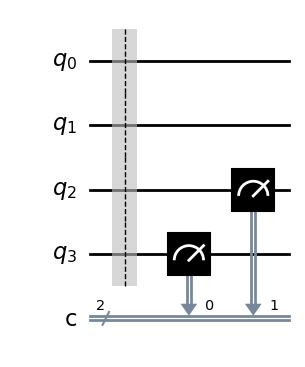

In [4]:
##Measurement/Output circuit = out_qc

out_qc = QuantumCircuit(qreg_q, creg_c)

out_qc.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
out_qc.measure(qreg_q[3], creg_c[0])
out_qc.measure(qreg_q[2], creg_c[1])

out_qc.draw(output='mpl')


In [5]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import XGate

# Initialize an empty list to store the modified circuits
modified_circuits_before = []


# Iterate over each qubit
for qubit in qreg_q:
    # Create a new circuit for the modified version
    modified_qc_before = QuantumCircuit(qreg_q, creg_c)
    
   
    # Keep track of whether a NOT gate has been inserted before and after the current qubit
    not_before_inserted = False

    # Iterate over each gate in the original circuit
    for instruction, qargs, cargs in cal_qc:
        
        # Check if the gate involves the current qubit
        if qubit not in qargs:
            # Insert a NOT gate before the gate if not already inserted
            if not_before_inserted:
                modified_qc_before.append(instruction, qargs, cargs)  
            else:
                modified_qc_before.h(qubit)
                modified_qc_before.append(instruction, qargs, cargs)
                not_before_inserted = True                       
        else:
            not_before_inserted=False
            modified_qc_before.append(instruction, qargs, cargs)        
            
    modified_circuits_before.append(modified_qc_before)
            
# Initialize a list to store the modified circuits
new_circuits1 = []

for modified_qc_before in modified_circuits_before:
    # Get the indices of the NOT gates
    not_gate_indices = [i for i, (instruction, _, _) in enumerate(modified_qc_before) if instruction.name == 'h']
    # Iterate over the instructions in the circuit
    for i, (instruction, qargs, cargs) in enumerate(modified_qc_before):
        if instruction.name == 'h' and i in not_gate_indices:
            # Create a new circuit for each NOT gate
            new_qc = modified_qc_before.copy()
            # Add the corresponding NOT gate to the new circuit
            new_qc.h(qargs[0])
            
            # Add the remaining gates from the original circuit to the new circuit
            for j in reversed(range(len(new_qc))):
                if new_qc[j][0].name == 'h' and j != i:
                    new_qc.data.pop(j)
            
            # Add the modified circuit to the list
            new_circuits1.append(new_qc)


        


# Display and save the modified circuits
# for i, modified_qc_before in enumerate(modified_circuits_before):
#     print(f"Modified Circuit (before) for qubit {i}:")
#     modified_qc_before.draw(output='mpl', filename=f"not_before_qubit_{i}.png")
#     print()

for i, new_qc in enumerate(new_circuits1):
    print(f"Hadamard trojan for qubit {i}:")
    new_qc.draw(output='mpl', filename=f"h_qubit_{i}.png")
    compiled_new_qc = transpile(new_qc, backend)

    file_path = f"hadamard_miniALU_{i}.qasm"
    with open(file_path, 'w') as file:
        file.write(compiled_new_qc.qasm())
    print()





Hadamard trojan for qubit 0:

Hadamard trojan for qubit 1:



Infected circuit 0
Input:0
{'00': 841, '01': 45, '10': 106, '11': 8}
{'00': 819, '01': 42, '10': 110, '11': 29}
Input:1
{'00': 164, '01': 654, '10': 57, '11': 125}
{'00': 186, '01': 647, '10': 60, '11': 107}
Input:2
{'00': 261, '01': 42, '10': 633, '11': 64}
{'00': 251, '01': 32, '10': 641, '11': 76}
Input:3
{'00': 61, '01': 201, '10': 213, '11': 525}
{'00': 73, '01': 199, '10': 184, '11': 544}
Infected circuit 1
Input:0
{'00': 552, '01': 33, '10': 366, '11': 49}
{'00': 821, '01': 43, '10': 117, '11': 19}
Input:1
{'00': 131, '01': 445, '10': 117, '11': 307}
{'00': 197, '01': 647, '10': 55, '11': 101}
Input:2
{'00': 546, '01': 37, '10': 362, '11': 55}
{'00': 268, '01': 19, '10': 631, '11': 82}
Input:3
{'00': 109, '01': 438, '10': 131, '11': 322}
{'00': 61, '01': 201, '10': 212, '11': 526}
5.34 26.9 -2.2
22.5 26.9 20.2
11.774999999999999


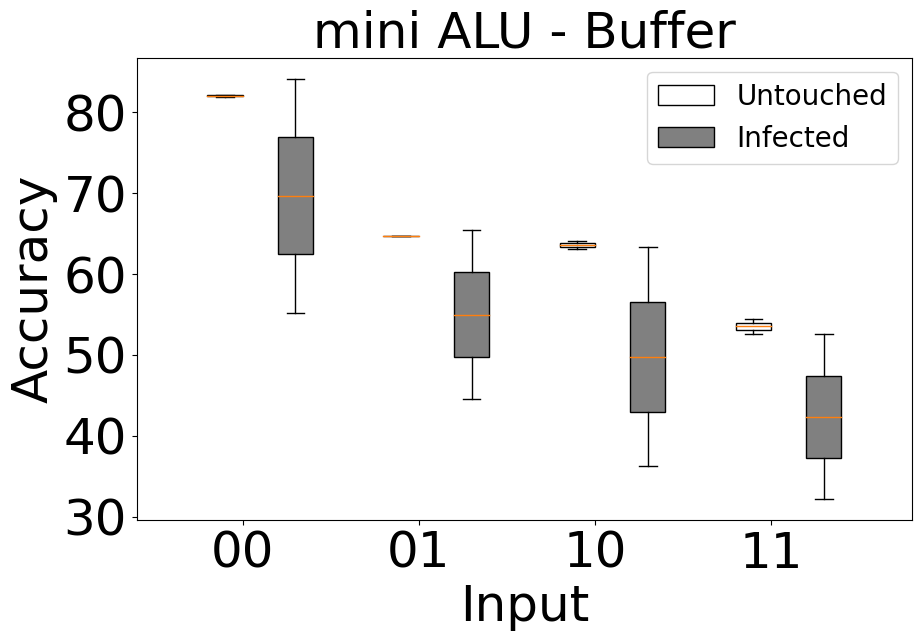

In [6]:
results_correct = {}  # Initialize an empty dictionary to store arrays
results_noisy = {}  # Initialize an empty dictionary to store arrays
# mean_degradation_array=[]
# max_degradation_array=[]
# min_degradation_array=[]
degradation_flip=[]
degradation_nonflip=[]
degradation=[]

for i, in_qc in enumerate(in_circuits):        
        rn_name = f"result_n_{i}"  # Create a string with the desired array name
        results_noisy[rn_name] = []
        rc_name = f"result_c_{i}"  # Create a string with the desired array name
        results_correct[rc_name] = []

for i, new_qc in enumerate(new_circuits1):
    print(f"Infected circuit {i}")
    ## cal_qc + out_qc = cal_out_qc
    new_qc.draw(output='mpl')
    cal_out_qc = new_qc.compose(out_qc, front=False, inplace=False)
    cal_out_qc.draw(output='mpl')
    ## in_qc + cal_out_qc= org_qc
    for i, in_qc in enumerate(in_circuits):
        print(f"Input:{i}")
        rn_name = f"result_n_{i}"  # Create a string with the desired array name
        rc_name = f"result_c_{i}"  # Create a string with the desired array name
        org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
        org_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = [i for i in range(1000, 1501, 100)]
        #for i in shots:
        #print(f"Shots: {i}:")    
        backend = FakeValencia()
        #backend = Aer.get_backend('qasm_simulator')
        qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3], optimization_level=1)
        results = backend.run(qc_noisy,shots=1000).result()
        
        # Extract the counts from the results
        count_noisy = results.get_counts(qc_noisy)

        #sort the counts

        count_noisy = dict(sorted(count_noisy.items()))
        print(count_noisy)
        #if i == 1000:
        cal_clean_qc = cal_qc.compose(out_qc, front=False, inplace=False)
        #cal_clean_qc.draw(output='mpl')
        org_c_qc = cal_clean_qc.compose(in_qc, front=True, inplace=False)
        #org_c_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = 1000    
        #backend = Aer.get_backend('qasm_simulator')
        backend = FakeValencia()
        qc = transpile(org_c_qc, backend=backend, initial_layout= [0,1,2,3], optimization_level=1)
        results = backend.run(qc,shots=1000).result()
        
        # Extract the counts from the results
        count = results.get_counts(qc)

        #sort the counts

        count = dict(sorted(count.items()))
        
        print(count)

        try:
            if ((count_noisy['01']/1000 > 0.5) and (count['01']/1000 > 0.5)):
                diff = count['01']-count_noisy['01']
                degradation_nonflip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['01']/10)
                results_noisy[rn_name].append(count_noisy['01']/10)
        except KeyError:
            pass
        try:
            if ((count_noisy['00']/1000 > 0.5) and (count['00']/1000 > 0.5)):
                diff = count['00']-count_noisy['00']
                degradation_nonflip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['00']/10)
                results_noisy[rn_name].append(count_noisy['00']/10)        
        except KeyError:
            pass
        try:
            if ((count_noisy['00']/1000 < 0.5) and (count['00']/1000 > 0.5)):
                diff = count['00']-count_noisy['00']
                degradation_flip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['00']/10)
                results_noisy[rn_name].append(count_noisy['00']/10)        
        except KeyError:
            pass
        try:
            if ((count_noisy['01']/1000 < 0.5) and (count['01']/1000 > 0.5)):
                diff = count['01']-count_noisy['01']
                degradation_flip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['01']/10)
                results_noisy[rn_name].append(count_noisy['01']/10)        
        except KeyError:
            pass
        try:
            if ((count_noisy['11']/1000 > 0.5) and (count['11']/1000 > 0.5)):
                diff = count['11']-count_noisy['11']
                degradation_nonflip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['11']/10)
                results_noisy[rn_name].append(count_noisy['11']/10)        
        except KeyError:
            pass
        try:
            if ((count_noisy['10']/1000 > 0.5) and (count['10']/1000 > 0.5)):
                diff = count['10']-count_noisy['10']
                degradation_nonflip.append(diff/10)
                degradation.append(diff/10)        
                results_correct[rc_name].append(count['10']/10)
                results_noisy[rn_name].append(count_noisy['10']/10)
        except KeyError:
            pass
        try:
            if ((count_noisy['11']/1000 < 0.5) and (count['11']/1000 > 0.5)):
                diff = count['11']-count_noisy['11']
                degradation_flip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['11']/10)
                results_noisy[rn_name].append(count_noisy['11']/10)        
        except KeyError:
            pass
        try:
            if ((count_noisy['10']/1000 < 0.5) and (count['10']/1000 > 0.5)):
                diff = count['10']-count_noisy['10']
                degradation_flip.append(diff/10)
                degradation.append(diff/10)
                results_correct[rc_name].append(count['10']/10)
                results_noisy[rn_name].append(count_noisy['10']/10)        
        except KeyError:
            pass
# for i, in_qc in enumerate(in_circuits):
#     rn_name = f"result_n_{i}"  # Create a string with the desired array name
#     rc_name = f"result_c_{i}"  # Create a string with the desired array name
#     mean_difference=np.mean(results_correct[rc_name])-np.mean(results_noisy[rn_name])
#     mean_degradation_array.append(mean_difference)
#     max_difference=np.max(results_correct[rc_name])-np.min(results_noisy[rn_name])
#     max_degradation_array.append(max_difference)
#     min_difference=np.min(results_correct[rc_name])-np.max(results_noisy[rn_name])
#     if min_difference>0:
#         min_degradation_array.append(min_difference)

        
avg_degradation_nf=np.mean(degradation_nonflip)   
max_degradation_nf=np.max(degradation_nonflip) 
min_degradation_nf=np.min(degradation_nonflip)    
print(avg_degradation_nf,max_degradation_nf, min_degradation_nf)
avg_degradation_f=np.mean(degradation_flip)   
max_degradation_f=np.max(degradation_flip) 
min_degradation_f=np.min(degradation_flip)    
print(avg_degradation_f,max_degradation_f, min_degradation_f)
avg_degradation=np.mean(degradation)
print(avg_degradation)

import matplotlib.pyplot as plt
import numpy as np

# Extract data from both dictionaries
data_to_plot_correct = list(results_correct.values())
data_to_plot_noisy = list(results_noisy.values())

# Determine the number of keys (assuming both dictionaries have the same keys)
num_keys = len(results_correct)

# Create positions for the side-by-side box plots
positions = np.arange(num_keys)

# Set up the figure
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

# Custom labels for x-axis (keys)
custom_labels = ['00','01', '10', '11']  # Replace with your custom labels

# Create side-by-side box plots for each key
for i, (data_correct, data_noisy) in enumerate(zip(data_to_plot_correct, data_to_plot_noisy)):
    position_correct = positions[i]
    position_noisy = positions[i] + 0.4  # Offset for side-by-side arrangement

    box_plot_correct = plt.boxplot(data_correct, positions=[position_correct], widths=0.2, patch_artist=True)
    box_plot_noisy = plt.boxplot(data_noisy, positions=[position_noisy], widths=0.2, patch_artist=True)

    # Customize box colors
    box_plot_correct['boxes'][0].set_facecolor('white')
    box_plot_noisy['boxes'][0].set_facecolor('grey')

# Set x-axis ticks and labels
plt.xticks(positions + 0.1, custom_labels,fontsize=36)
plt.xlabel('Input',fontsize=36)
plt.xticks(fontsize=36)
plt.yticks(fontsize=36)
plt.ylabel('Accuracy',fontsize=36)
plt.title('mini ALU - Buffer',fontsize=36)

# Add legend
plt.legend([box_plot_correct['boxes'][0], box_plot_noisy['boxes'][0]], ['Untouched', 'Infected'],fontsize=20)

plt.show()



In [10]:
from itertools import combinations
new_circuits2 = []         

for modified_qc_before in modified_circuits_before:
    # Get the indices of the NOT gates
    not_gate_indices = [i for i, (instruction, _, _) in enumerate(modified_qc_before) if instruction.name == 'x']

    # Iterate over the instructions in the circuit
    for combination in combinations(not_gate_indices, 2):
        new_qc = modified_qc_before.copy()                             
            
        # Add the remaining gates from the original circuit to the new circuit
        for j in reversed(range(len(new_qc))):
            if j not in combination and new_qc[j][0].name == 'x':
                new_qc.data.pop(j)
        
        # Add the modified circuit to the list
        new_circuits2.append(new_qc)


for i, new_qc in enumerate(new_circuits2):
    print(f"Modified Circuit (before) for qubit {i}:")
    new_qc.draw(output='mpl', filename=f"not_{i}.png")
    print()

In [6]:
from qiskit import QuantumCircuit





# Generate circuits with an extra NOT gate from each circuit in modified_circuits_before
modified_cal_circuits = []
for modified_qc_before in modified_circuits_before:
    # Create a new circuit by combining modified_circuit with cal_qc
    modified_cal_circuit = cal_qc.copy()
    
    # Add the extra NOT gate from modified_circuit to modified_cal_circuit
    for instruction, qargs, cargs in modified_qc_before:
        if instruction.name == 'x':
            modified_cal_circuit.x(qargs[0])
    
    # Add the modified_cal_circuit to the list
    modified_cal_circuits.append(modified_cal_circuit)



for i, modified_cal_circuit in enumerate(modified_cal_circuits):
    print(f"Modified Circuit new for qubit {i}:")
    modified_cal_circuit.draw(output='mpl', filename=f"new_{i}.png")
    print()


Modified Circuit new for qubit 0:

Modified Circuit new for qubit 1:

Modified Circuit new for qubit 2:

Modified Circuit new for qubit 3:

Modified Circuit new for qubit 4:



In [9]:
cal_out_qc = new_qc.compose(cal_qc, front=False, inplace=False)
cal_out_qc.draw(output='mpl')
## in_qc + cal_out_qc= org_qc

org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
org_qc.draw(output='mpl')

# Run the circuit and get results

backend = FakeValencia()
qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3,4], optimization_level=1)
shots = 1000
results = backend.run(qc_noisy,shots=shots).result()
 
# Extract the counts from the results
count_noisy = results.get_counts(qc_noisy)

#sort the counts

count_noisy = dict(sorted(count_noisy.items()))

print(count_noisy)

#draw a histogram

plt.bar(count_noisy.keys(), count_noisy.values(), color='g')
plt.xlabel('States')
plt.ylabel('Counts')
plt.title('Original Circuit_FakeValencia Simulator')
plt.show()

CircuitError: "Trying to compose with another QuantumCircuit which has more 'in' edges."

Infected circuit 0
Input:0
{'00': 822, '01': 52, '10': 115, '11': 11}
{'00': 820, '01': 40, '10': 116, '11': 24}
diff=2
Input:1
{'00': 176, '01': 616, '10': 37, '11': 171}
{'00': 171, '01': 665, '10': 48, '11': 116}
diff=-49
Input:2
{'00': 254, '01': 71, '10': 635, '11': 40}
{'00': 245, '01': 22, '10': 653, '11': 80}
diff=-18
Input:3
{'00': 71, '01': 213, '10': 182, '11': 534}
{'00': 69, '01': 201, '10': 228, '11': 502}
diff=32


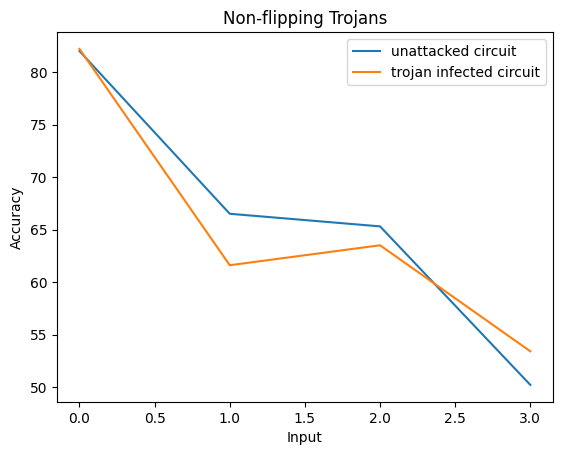

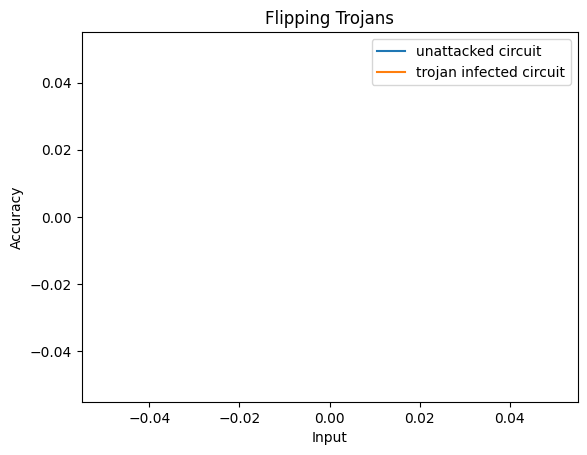

Infected circuit 1
Input:0
{'00': 243, '01': 35, '10': 639, '11': 83}
{'00': 824, '01': 41, '10': 115, '11': 20}
Input:1
{'00': 72, '01': 203, '10': 196, '11': 529}
{'00': 197, '01': 649, '10': 53, '11': 101}
Input:2
{'00': 838, '01': 35, '10': 106, '11': 21}
{'00': 242, '01': 30, '10': 639, '11': 89}
Input:3
{'00': 174, '01': 660, '10': 42, '11': 124}
{'00': 66, '01': 190, '10': 221, '11': 523}


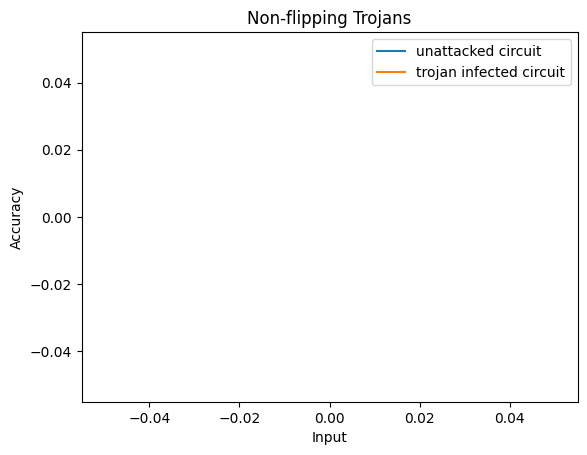

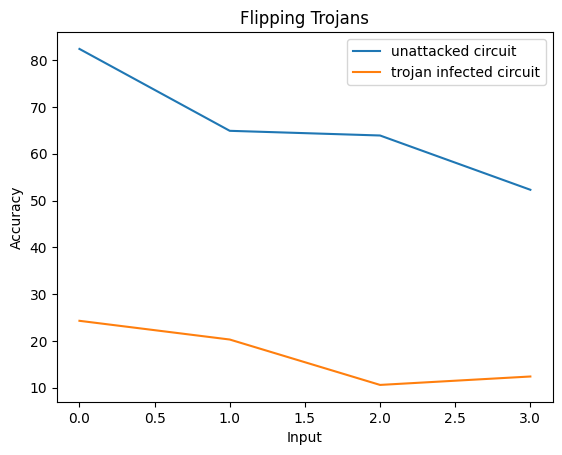

In [13]:


for i, new_qc in enumerate(new_circuits1):
    results_noisy = [] 
    results_correct_flip =[]
    results_correct =[]
    results_noisy_flip =[]
    flip_circuits=[]
    non_flip_circuits=[]
    print(f"Infected circuit {i}")
    ## cal_qc + out_qc = cal_out_qc
    new_qc.draw(output='mpl')
    cal_out_qc = new_qc.compose(out_qc, front=False, inplace=False)
    cal_out_qc.draw(output='mpl')
    ## in_qc + cal_out_qc= org_qc
    for i, in_qc in enumerate(in_circuits):
        print(f"Input:{i}")
        org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
        org_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = [i for i in range(1000, 1501, 100)]
        #for i in shots:
        #print(f"Shots: {i}:")    
        backend = FakeValencia()
        qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3], optimization_level=1)
        results = backend.run(qc_noisy,shots=1000).result()
        
        # Extract the counts from the results
        count_noisy = results.get_counts(qc_noisy)

        #sort the counts

        count_noisy = dict(sorted(count_noisy.items()))
        


        print(count_noisy)
        #if i == 1000:
        cal_clean_qc = cal_qc.compose(out_qc, front=False, inplace=False)
        #cal_clean_qc.draw(output='mpl')
        org_c_qc = cal_clean_qc.compose(in_qc, front=True, inplace=False)
        #org_c_qc.draw(output='mpl')
        # Run the circuit and get results
        #shots = 1000    
        backend = FakeValencia()
        qc = transpile(org_c_qc, backend=backend, initial_layout= [0,1,2,3], optimization_level=1)
        results = backend.run(qc,shots=1000).result()
        
        # Extract the counts from the results
        count = results.get_counts(qc)

        #sort the counts

        count = dict(sorted(count.items()))
        
        print(count)

        if (count['11']/1000 > 0.5):
            if (count_noisy['11']/1000 > 0.5):
                diff = count_noisy['11']-count['11']
                print(f"diff={diff}")
                results_correct.append(count['11']/10)
                results_noisy.append(count_noisy['11']/10)
                non_flip_circuits.append(i)
            else:
                results_correct_flip.append(count['11']/10)
                results_noisy_flip.append(count_noisy['11']/10)
                flip_circuits.append(i)
        
        if (count['00']/1000 > 0.5):
            if (count_noisy['00']/1000 > 0.5):
                diff = count_noisy['00']-count['00']
                print(f"diff={diff}")
                results_correct.append(count['00']/10)
                results_noisy.append(count_noisy['00']/10)
                non_flip_circuits.append(i)
            else:
                results_correct_flip.append(count['00']/10)
                results_noisy_flip.append(count_noisy['00']/10)
                flip_circuits.append(i)

        if (count['01']/1000 > 0.5):
            if (count_noisy['01']/1000 > 0.5):
                diff = count_noisy['01']-count['01']
                print(f"diff={diff}") 
                results_correct.append(count['01']/10)
                results_noisy.append(count_noisy['01']/10)
                non_flip_circuits.append(i)
            else:
                results_correct_flip.append(count['01']/10)
                results_noisy_flip.append(count_noisy['01']/10)
                flip_circuits.append(i)

        if (count['10']/1000 > 0.5):
            if (count_noisy['10']/1000 > 0.5):
                diff = count_noisy['10']-count['10']
                print(f"diff={diff}")  
                results_correct.append(count['10']/10)
                results_noisy.append(count_noisy['10']/10)
                non_flip_circuits.append(i)
            else:
                results_correct_flip.append(count['10']/10)
                results_noisy_flip.append(count_noisy['10']/10)
                flip_circuits.append(i)
    import matplotlib.pyplot as plt
    import numpy as np

    # Assuming 'array1' and 'array2' are your arrays of data

    # Plot the data from both arrays
    plt.plot(non_flip_circuits, results_correct, label='unattacked circuit')
    plt.plot(non_flip_circuits, results_noisy, label='trojan infected circuit')

    # Set labels and title
    plt.xlabel('Input')
    plt.ylabel('Accuracy')
    plt.title('Non-flipping Trojans')


    # Display legend
    plt.legend()

    # Show the plot
    plt.show()

    plt.plot(flip_circuits, results_correct_flip, label='unattacked circuit')
    plt.plot(flip_circuits, results_noisy_flip, label='trojan infected circuit')

    # Set labels and title
    plt.xlabel('Input')
    plt.ylabel('Accuracy')
    plt.title('Flipping Trojans')

    # Display legend
    plt.legend()

    # Show the plot
    plt.show()


In [7]:
for i, new_qc in enumerate(new_circuits1):
    print(f"Infected circuit {i}")
    ## cal_qc + out_qc = cal_out_qc
    new_qc.draw(output='mpl')
    cal_out_qc = new_qc.compose(out_qc, front=False, inplace=False)
    cal_out_qc.draw(output='mpl')
    ## in_qc + cal_out_qc= org_qc
    for i, in_qc in enumerate(in_circuits):
        print(f"Input:{i}")
        org_qc = cal_out_qc.compose(in_qc, front=True, inplace=False)
        org_qc.draw(output='mpl')
        # Run the circuit and get results
        shots = [i for i in range(1000, 1501, 100)]
        for i in shots:
            print(f"Shots: {i}:")    
            backend = FakeValencia()
            qc_noisy = transpile(org_qc, backend=backend, initial_layout= [0,1,2,3], optimization_level=1)
            results = backend.run(qc_noisy,shots=i).result()
            
            # Extract the counts from the results
            count_noisy = results.get_counts(qc_noisy)

            #sort the counts

            count_noisy = dict(sorted(count_noisy.items()))

            print(count_noisy)

            #draw a histogram

            

Input:0
Shots: 1000:
{'00': 826, '01': 53, '10': 112, '11': 9}
Shots: 1100:
{'00': 900, '01': 50, '10': 133, '11': 17}
Shots: 1200:
{'00': 1005, '01': 59, '10': 120, '11': 16}
Shots: 1300:
{'00': 1075, '01': 61, '10': 146, '11': 18}
Shots: 1400:
{'00': 1168, '01': 65, '10': 148, '11': 19}
Shots: 1500:
{'00': 1259, '01': 61, '10': 167, '11': 13}
Input:1
Shots: 1000:
{'00': 196, '01': 578, '10': 64, '11': 162}
Shots: 1100:
{'00': 193, '01': 698, '10': 47, '11': 162}
Shots: 1200:
{'00': 236, '01': 709, '10': 64, '11': 191}
Shots: 1300:
{'00': 252, '01': 796, '10': 66, '11': 186}
Shots: 1400:
{'00': 235, '01': 863, '10': 64, '11': 238}
Shots: 1500:
{'00': 262, '01': 918, '10': 63, '11': 257}
Input:2
Shots: 1000:
{'00': 236, '01': 75, '10': 635, '11': 54}
Shots: 1100:
{'00': 290, '01': 67, '10': 690, '11': 53}
Shots: 1200:
{'00': 257, '01': 87, '10': 800, '11': 56}
Shots: 1300:
{'00': 326, '01': 117, '10': 795, '11': 62}
Shots: 1400:
{'00': 370, '01': 93, '10': 883, '11': 54}
Shots: 1500:
{